## Probability and Regression

My own reworking of the example code within the text book.

In [195]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import plotnine as p

In [169]:
# read data
def read_data(file):
    return pd.read_csv("https://raw.github.com/scunning1975/mixtape/master/" + file)

In [170]:
np.random.seed(1)

df = pd.DataFrame({
    'x': np.random.normal(size=10000),
    'u': np.random.normal(size=10000)})
df['y'] = 5.5*df['x'].values + 12*df['u'].values

In [171]:
df

,x,u,y
0,1.624345,-0.122474,7.464213
1,-0.611756,0.228170,-0.626622
2,-0.528172,-0.352305,-7.132606
3,-1.072969,-0.830553,-15.867969
4,0.865408,-0.261090,1.626664
...,...,...,...
9995,0.072959,-0.943208,-10.917229
9996,0.489102,0.782216,12.076651
9997,-1.014144,2.408434,23.323415
9998,-0.062696,0.882786,10.248597


In [172]:
reg_df = sm.OLS.from_formula('y ~ x', data=df).fit()
reg_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2237.
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        18:05:42   Log-Likelihood:                -39049.
No. Observations:               10000   AIC:                         7.810e+04
Df Residuals:                    9998   BIC:                         7.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1114      0.120      0.927      0.354      -0.124       0.347
x              5.6887      0.120     47.293      0.000       5.453       5.924
==============================================================================
Omnibus:                        0.640   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.672
Skew:                          -0.012   Prob(JB):                        0.715
Kurtosis:                       2.968   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### After running the OLS fit, we can predict the parameters of $\hat{y}$ (predicted value of $y$, given the OLS fit) and $\hat{u}$ (the residual, i.e., $y - \hat{y}$ ) with the `statsmodel` package, or manually, using the coefficients from the summary above.


$$
y = \beta_0 + \beta_1 x + u
$$

where:
- $x =$ data point that is influencing the effect
- $y =$ the effect/outcome
- $\beta_0 =$ the intercept
- $\beta_1 =$ the coefficient for $x$
- $u = $ the error term (captures other factors that are causing the outcome effect not captured by this model)

This represents our model of the world when applying OLS.


Then, given some observed data, the equation is represented with the  $\hat{~}$  symbol to show that we're making estimates. Also, the $u$ term now represents the _residuals_ — the difference between the predicted $\hat{y}$ and the real $y$ - instead of the error term.

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x + u
$$

where:
- $x =$ data point that is influencing the estimated effect
- $\hat{y} =$ the estimated effect/outcome
- $\beta_0 =$ the estimated intercept
- $\beta_1 =$ the estimated coefficient for $x$
- $u = $ the residual (captures the difference between the predicted $\hat{y}$ and the real $y$)


**In the summary above, the `Intercept` coefficient = the intercept of the fit and the `x` coefficient represents $\hat{\beta}_1$**

This means that our OLS model fit equation becomes:

$$
\hat{y} = 0.1114 + 5.6887x
$$

As mentioned above, we can calculate the $\hat{y}$ and $u$ (residual) values for all data points using either the `statsmodels` object, `reg_tb`, or simply plugging our `x` values into the equation returned by the summary data.

In [173]:

# Calculating values with statsmodels
df['yhat1'] = reg_df.predict(df)
df['uhat1'] = reg_df.resid

# Calculating them manually
df['yhat2'] = 0.1114 + 5.6887*df['x']
df['uhat2'] = df['y'] - df['yhat2']

### As you can see below, the values are very similar.

In [174]:
df[['yhat1', 'yhat2']]

,yhat1,yhat2
0,9.351735,9.351813
1,-3.368695,-3.368699
2,-2.893210,-2.893211
3,-5.992376,-5.992397
4,5.034394,5.034444
...,...,...
9995,0.526418,0.526439
9996,2.893719,2.893755
9997,-5.657741,-5.657760
9998,-0.245276,-0.245260


In [175]:
df[['uhat1', 'uhat2']]

,uhat1,uhat2
0,-1.887522,-1.887601
1,2.742073,2.742076
2,-4.239396,-4.239396
3,-9.875593,-9.875572
4,-3.407730,-3.407780
...,...,...
9995,-11.443647,-11.443668
9996,9.182932,9.182895
9997,28.981156,28.981175
9998,10.493874,10.493857


### While there are some minor differences we can see that, overall, the averages are very similar. Compare the summary statistics for `yhat1` with `yhat2` as well as `uhat1` with `uhat2` and you'll see that they are nearly identical.

In [176]:
df.describe()

,x,u,y,yhat1,uhat1,yhat2,uhat2
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,0.009773,0.009435,0.166975,0.166975,7.336354e-16,0.166994,-0.000019
std,0.998836,1.001239,13.289365,5.682040,1.201339e+01,5.682077,12.013394
min,-3.656440,-3.451403,-50.654682,-20.688875,-4.142425e+01,-20.688991,-41.424248
25%,-0.662925,-0.672294,-8.827691,-3.659775,-8.199882e+00,-3.659781,-8.199908
50%,0.008454,0.018803,0.242724,0.159473,4.497835e-02,0.159493,0.044993
75%,0.671809,0.688683,9.232769,3.933075,8.147307e+00,3.933119,8.147305
max,4.026849,4.168118,48.162716,23.018769,5.000751e+01,23.018936,50.007515


In [177]:
(df['yhat1'] * df['uhat1']).sum()

-1.800799509510398e-10

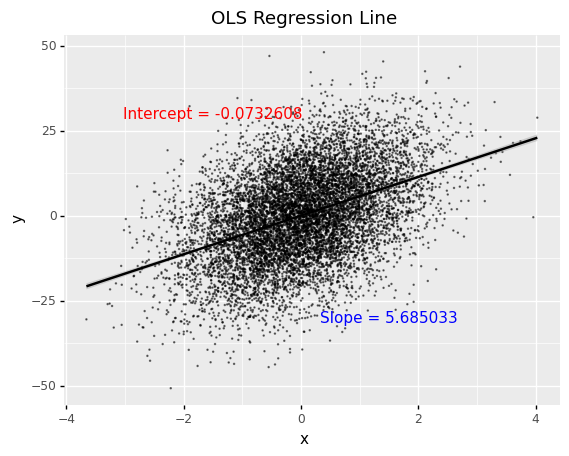

<ggplot: (8772128294717)>

In [178]:
p.ggplot(df, p.aes(x='x', y='y')) +\
    p.ggtitle("OLS Regression Line") +\
    p.geom_point(size = 0.00001, color = "black", alpha = 0.5) +\
    p.geom_smooth(p.aes(x='x', y='y'), method = "lm", color = "black") +\
    p.annotate("text", x = -1.5, y = 30, color = "red", 
             label = "Intercept = {}".format(-0.0732608)) +\
    p.annotate("text", x = 1.5, y = -30, color = "blue", 
             label = "Slope = {}".format(5.685033))

### Showing the affect of residuals

In [179]:
coefs = np.zeros(1000)

# For 1,000 random data sets...
for i in range(1000):
    
    # Create 10,000 random observations
    df = pd.DataFrame(
        {
            'x': 9*np.random.normal(size=10000),
            'u': 36*np.random.normal(size=10000)
        }
    )
    
    # Feed all data points to into the equation: 3 + 2x + U
    df['y'] = 3 + 2*df['x'].values + df['u'].values
    
    # Calculate the OLS fit
    reg_df = sm.OLS.from_formula('y ~ x', data=df).fit()
    
    # Store the `x` coefficient, i.e., the B_1 estimate (i.e., \hat{B_1})
    coefs[i] = reg_df.params['x']

In [180]:
coefs.mean()

1.9991807891436975

## The Expected Value of OLS

### Now we can create a histogram of those coefficients. As you can see below, the predicted coefficients correctly group around 2, as this was the coefficient that we fed into our equation above. That said, it is not always exactly 2 because we are creating random noise in the form of the random residual values. 


### If you rerun the equation above but comment out the `+ tb['u'].values` portion of line 15, you'll see that _all_ predicted coefficients are _exactly 2_ and the noise in the below histogram will go away.

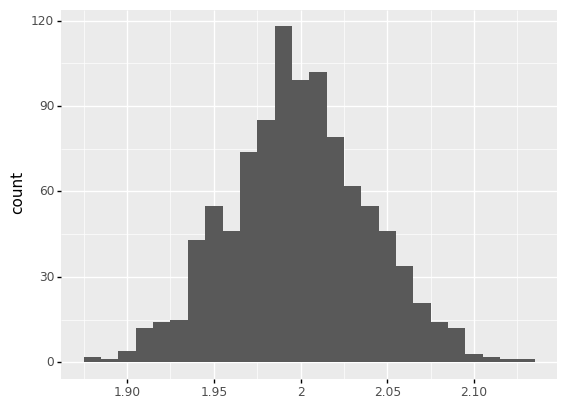

<ggplot: (8772133459485)>

In [181]:
p.ggplot() +\
  p.geom_histogram(p.aes(x=coefs), binwidth = 0.01)

## Some algebraic properties of OLS

### 1. The sum of the residuals, $u$, will always = 0

### Note that the sum of the residuals, by design, will always equal 0. This is because the OLS fit minimized difference between the data points and the fitted line. More specifically, the OLS form is trying to find the best fit line that minimizes — equals zero — the amount of residual error.

In [183]:
df['yhat'] = reg_df.predict(df)
df['uhat'] = reg_df.resid

In [252]:
reg_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     2637.
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        18:33:15   Log-Likelihood:                -49905.
No. Observations:               10000   AIC:                         9.981e+04
Df Residuals:                    9998   BIC:                         9.983e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9349      0.356      8.249      0.000       2.237       3.632
x              2.0111      0.039     51.352      0.000       1.934       2.088
==============================================================================
Omnibus:                        1.079   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                1.076
Skew:                           0.025   Prob(JB):                        0.584
Kurtosis:                       3.000   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
print(f"Residual sum = {df['uhat'].sum()}")

# The very small number has to do with rounding and floating point representation issues so
# we can check with the np.allclose() method to make sure it is very close to zero.
np.allclose(df['uhat'].sum(), 0)

Residual sum = -1.0913936421275139e-11


True

In [185]:
# Remember, this is just the difference between
# the predicted y value (yhat) and the real value for y
(df['y'] - df['yhat']).sum()

-1.0913936421275139e-11

### 2. Given what residuals represent: $\hat{y} + \hat{u} = y$

In [186]:
# This shows the difference for each value
np.allclose(df['yhat'] + df['uhat'], df['y'])

True

In [187]:
# This shows the difference for the mean of all values
np.allclose(
    df['yhat'].mean() + df['uhat'].mean(),
    df['y'].mean()
)

True

### 3. Again, by design, the residuals do not correlate with either the $x$ or $\hat{y}$ variables.

In [188]:
import matplotlib.pyplot as plt

#### First, we can show this visually

Text(0, 0.5, 'Residuals')

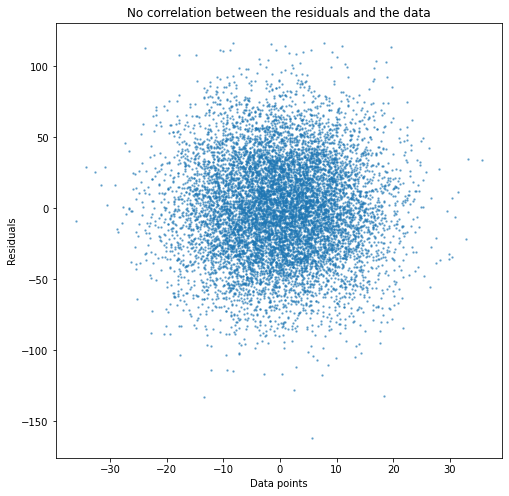

In [189]:
plt.figure(figsize=(8,8))
plt.title("No correlation between the residuals and the data")
plt.scatter(df['x'], df['uhat'], s=2, alpha=.5)
plt.xlabel("Data points")
plt.ylabel("Residuals")

Text(0, 0.5, 'Fitted values')

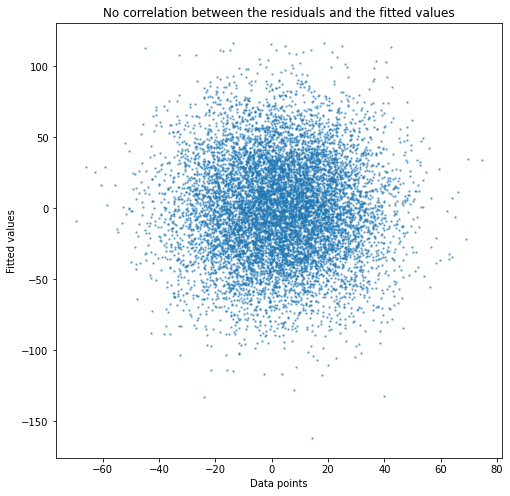

In [190]:
plt.figure(figsize=(8,8))
plt.title("No correlation between the residuals and the fitted values")
plt.scatter(df['yhat'], df['uhat'], s=2, alpha=.5)
plt.xlabel("Data points")
plt.ylabel("Fitted values")

#### Next we can show this mathematically.

First, we can just import and calculate the correlation using `scipy`...

In [193]:
from scipy.stats import pearsonr

r,pval = pearsonr(df['x'], df['uhat'])
print(f'Correlation = {r}')
print(f'pvalue = {pval}')

Correlation = -1.0928757898653885e-16
pvalue = 1.0000000000051315


In [194]:
r,pval = pearsonr(df['yhat'], df['uhat'])
print(f'Correlation = {r}')
print(f'pvalue = {pval}')

Correlation = -1.0928757898653885e-16
pvalue = 1.0000000000051315


Lets also consider the equation for correlation:

$$
r = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2(y_i - \bar{y})^2}}
$$

Since the mean value in the numerator is just subtracting away the average of each value, and the variance in the denominator is just a normalization factor, we can simply look at the sum of all these values — if they are not correlated at all, the value should equal zero. That is:

If $\mbox{correlation}(x,\hat{u}) = 0$, then:

$$
\sum x_i \hat{u}_i = 0
$$



In [196]:
np.allclose( (df['x'] * df['uhat']).sum(), 0)

True

The same logic applies to the values of $\hat{y}$ and $\hat{u}$, so again: if $\mbox{correlation}(\hat{y},\hat{u}) = 0$, then:

$$
\sum \hat{y}_i \hat{u}_i = 0
$$

In [197]:
np.allclose( (df['yhat'] * df['uhat']).sum(), 0)

True

In [207]:
df

,x,u,y,yhat,uhat
0,15.316863,-16.390032,17.243694,33.738367,-16.494673
1,-13.347839,21.410200,-2.285479,-23.908759,21.623280
2,-2.131231,46.592382,45.329919,-1.351217,46.681137
3,3.412242,18.044185,27.868670,9.797174,18.071496
4,0.715351,-31.342191,-26.911488,4.373500,-31.284988
...,...,...,...,...,...
9995,5.649632,37.932786,52.232050,14.296752,37.935298
9996,-0.314790,21.834509,24.204929,2.301799,21.903130
9997,-5.592853,-24.261739,-32.447445,-8.312830,-24.134616
9998,12.481612,14.194725,42.157950,28.036439,14.121511


In [211]:
((df['y'] - df['y'].mean())**2).sum()

15991778.105062038

In [213]:
(df['yhat'] - df['y']).sum()

1.0913936421275139e-11

2.011084030477714

-80.44336121910857

In [ ]:

text_y = reg_df.params['const'] + results.params['x'] * text_x

Text(0, 0.5, 'y-values')

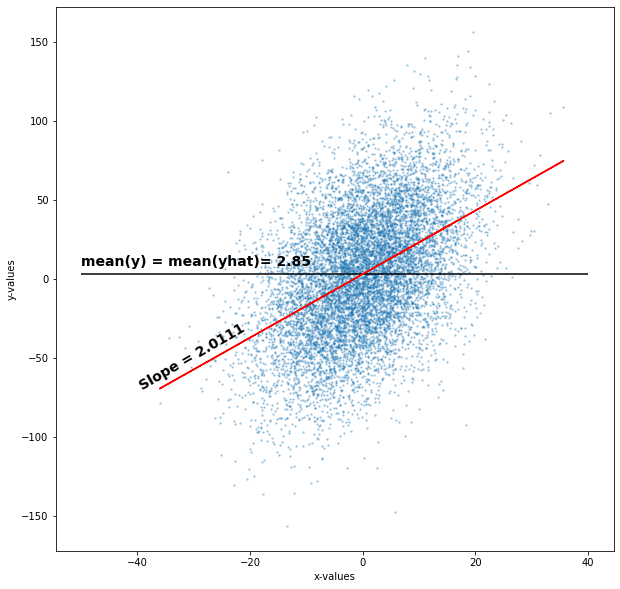

In [275]:
plt.figure(figsize=(10,10))

# Plot the x and y data
plt.scatter(df['x'], df['y'], s = 2, alpha=.3)

text_x = -40
text_y = reg_df.params["x"] * text_x

plt.annotate(
    text = f"Slope = {np.round(reg_df.params['x'], 4)}",
    xy=(text_x,text_y + 10),
    rotation = 30,
    fontweight='bold',
    fontsize=14
)

# Plot the fit line
plt.plot(df['x'], df['yhat'], c='red')
plt.annotate(
    text = f"mean(y) = mean(yhat)= {np.round(df['y'].mean(),2)}",
    xy=(-50,df['y'].mean()+5),
    fontweight='bold',
    fontsize=14
)


# plot the mean(y) value
plt.hlines(y=df['y'].mean(), xmin=-50, xmax=40, color='black')

plt.xlabel("x-values")
plt.ylabel("y-values")


# Goodness of fit


## Different types of 'Sum of squares'

### Total sum of squares (SST):

$$
\mbox{SST} = \sum(y_i - \bar{y})^2
$$

This is the sum of the squared vertical distance between all data points and the mean $y$ value (black line above).

### Explained sum of squares (SSE):

$$
\mbox{SSE} = \sum(\hat{y}_i - \bar{y})^2
$$

This is the sum of the squared vertical distance between all predicted $\hat{y}$ values (those that fall on the red line above) and mean $y$ value (black line above).

### Residual sum of squares (SSR):

$$
\mbox{SSR} = \sum \hat{u}^2 = \sum (y_i - \hat{y}_i)^2
$$

This is the sum of the squared vertical distance between the predicted $\hat{y}$ values (those that fall on the red line above) and the real $y$ values .



